In [1]:
#ann
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sb
 
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('parkinsons.data')

In [3]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
#dropping the name colunm
df.drop("name", inplace=True, axis=1)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
#removing the coorelated columns
columns = list(df.columns)
for col in columns:
    if col == 'status':
        continue
 
    filtered_columns = [col]
    for col1 in df.columns:
        if((col == col1) | (col == 'status')):
            continue
 
        val = df[col].corr(df[col1])
 
        if val > 0.7:
            # If the correlation between the two
            # features is more than 0.7 remove
            columns.remove(col1)
            continue
        else:
            filtered_columns.append(col1)
 
    # After each iteration filter out the columns
    # which are not highly correlated features.
    df = df[filtered_columns]

In [6]:
df

,D2,spread2,spread1,DFA,RPDE,HNR,MDVP:Jitter(%),MDVP:Flo(Hz),MDVP:Fhi(Hz),MDVP:Fo(Hz),status
0,2.301442,0.266482,-4.813031,0.815285,0.414783,21.033,0.00784,74.997,157.302,119.992,1
1,2.486855,0.335590,-4.075192,0.819521,0.458359,19.085,0.00968,113.819,148.650,122.400,1
2,2.342259,0.311173,-4.443179,0.825288,0.429895,20.651,0.01050,111.555,131.111,116.682,1
3,2.405554,0.334147,-4.117501,0.819235,0.434969,20.644,0.00997,111.366,137.871,116.676,1
4,2.332180,0.234513,-3.747787,0.823484,0.417356,19.649,0.01284,110.655,141.781,116.014,1
...,...,...,...,...,...,...,...,...,...,...,...
190,2.657476,0.121952,-6.538586,0.657899,0.448439,19.517,0.00459,94.261,230.978,174.188,0
191,2.784312,0.129303,-6.195325,0.683244,0.431674,19.147,0.00564,89.488,253.017,209.516,0
192,2.679772,0.158453,-6.787197,0.655683,0.407567,17.883,0.01360,74.287,240.005,174.688,0
193,2.138608,0.207454,-6.744577,0.643956,0.451221,19.020,0.00740,74.904,396.961,198.764,0


In [7]:
#reducing the feature space up to 7 by using the chi-square test.
X = df.drop('status', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=7)
selector.fit(X_norm, df['status'])
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]
filtered_data['status'] = df['status']
df = filtered_data
df.shape

/var/folders/9y/610tzfp14gv7y3_n3zqsfvv80000gn/T/ipykernel_61428/3020179212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['status'] = df['status']


(195, 8)

In [8]:
df

,D2,spread2,spread1,RPDE,MDVP:Jitter(%),MDVP:Flo(Hz),MDVP:Fo(Hz),status
0,2.301442,0.266482,-4.813031,0.414783,0.00784,74.997,119.992,1
1,2.486855,0.335590,-4.075192,0.458359,0.00968,113.819,122.400,1
2,2.342259,0.311173,-4.443179,0.429895,0.01050,111.555,116.682,1
3,2.405554,0.334147,-4.117501,0.434969,0.00997,111.366,116.676,1
4,2.332180,0.234513,-3.747787,0.417356,0.01284,110.655,116.014,1
...,...,...,...,...,...,...,...,...
190,2.657476,0.121952,-6.538586,0.448439,0.00459,94.261,174.188,0
191,2.784312,0.129303,-6.195325,0.431674,0.00564,89.488,209.516,0
192,2.679772,0.158453,-6.787197,0.407567,0.01360,74.287,174.688,0
193,2.138608,0.207454,-6.744577,0.451221,0.00740,74.904,198.764,0


In [9]:
features = df.drop('status', axis=1)
target = df['status']
 
X_train, X_val,Y_train, Y_val = train_test_split(features, target,test_size=0.2,random_state=10)
X_train.shape, X_val.shape

((156, 7), (39, 7))

In [10]:
# Defining the model
model_self = keras.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation = 'sigmoid'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(1, activation = 'sigmoid')
])


Metal device set to: Apple M2


In [11]:
model_self.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [13]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
    gra = model_self.fit(X_train, Y_train, epochs=100,validation_data=(X_val,Y_val), batch_size=128)
    

   

Epoch 1/100
2/2 [==============================] - 0s 33ms/step - loss: 0.4998 - accuracy: 0.7628 - val_loss: 0.5412 - val_accuracy: 0.7179
Epoch 2/100
2/2 [==============================] - 0s 20ms/step - loss: 0.4994 - accuracy: 0.7692 - val_loss: 0.5462 - val_accuracy: 0.7949
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 0.4766 - accuracy: 0.7628 - val_loss: 0.5542 - val_accuracy: 0.8462
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 0.4886 - accuracy: 0.7628 - val_loss: 0.5661 - val_accuracy: 0.8205
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 0.4672 - accuracy: 0.7628 - val_loss: 0.5801 - val_accuracy: 0.8205
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 0.4518 - accuracy: 0.7692 - val_loss: 0.5939 - val_accuracy: 0.7949
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 0.4535 - accuracy: 0.8013 - val_loss: 0.6109 - val_accuracy: 0.7949
Epoch 8/100
2/2 [===

2/2 [==============================] - 0s 15ms/step - loss: 0.2282 - accuracy: 0.9038 - val_loss: 0.3064 - val_accuracy: 0.8205
Epoch 60/100
2/2 [==============================] - 0s 15ms/step - loss: 0.2751 - accuracy: 0.8590 - val_loss: 0.3061 - val_accuracy: 0.8205
Epoch 61/100
2/2 [==============================] - 0s 15ms/step - loss: 0.2237 - accuracy: 0.8974 - val_loss: 0.3210 - val_accuracy: 0.8205
Epoch 62/100
2/2 [==============================] - 0s 15ms/step - loss: 0.2288 - accuracy: 0.9103 - val_loss: 0.3257 - val_accuracy: 0.8205
Epoch 63/100
2/2 [==============================] - 0s 14ms/step - loss: 0.2100 - accuracy: 0.9231 - val_loss: 0.3207 - val_accuracy: 0.8205
Epoch 64/100
2/2 [==============================] - 0s 15ms/step - loss: 0.2046 - accuracy: 0.9103 - val_loss: 0.3080 - val_accuracy: 0.8718
Epoch 65/100
2/2 [==============================] - 0s 16ms/step - loss: 0.2090 - accuracy: 0.9423 - val_loss: 0.2832 - val_accuracy: 0.8462
Epoch 66/100
2/2 [========

In [16]:
loss, accuracy = model_self.evaluate(features, target)

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'


1/7 [===>..........................] - ETA: 12s - loss: 0.1700 - accuracy: 0.8750

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x3x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x3x1x1xi1>'


7/7 [==============================] - 3s 230ms/step - loss: 0.2372 - accuracy: 0.8718


In [73]:
y_pred_lr=model_self.predict(X_val)

2/2 [==============================] - 0s 25ms/step


In [69]:
#saving model
model_self.save('parkinsons_tf.h5')

In [15]:
#loading model
from keras.models import load_model
savedModel=load_model('parkinsons_tf.h5')

In [17]:
loss, accuracy = savedModel.evaluate(features, target)

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'


1/7 [===>..........................] - ETA: 7s - loss: 0.0161 - accuracy: 1.0000

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x3x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x3x1x1xi1>'


7/7 [==============================] - 2s 142ms/step - loss: 0.0352 - accuracy: 0.9949


In [70]:
model_self.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Batc  (None, 7)                28        
 hNormalization)                                                 
                                                                 
 dense_55 (Dense)            (None, 100)               800       
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_56 (Dense)            (None, 50)                5050      
                                                                 
 dense_57 (Dense)            (None, 30)                1530      
                                                                 
 dense_58 (Dense)            (None, 20)                620       
                                                     

In [72]:
img=tf.keras.utils.plot_model(model_self, 'Parkinsons.jpg')

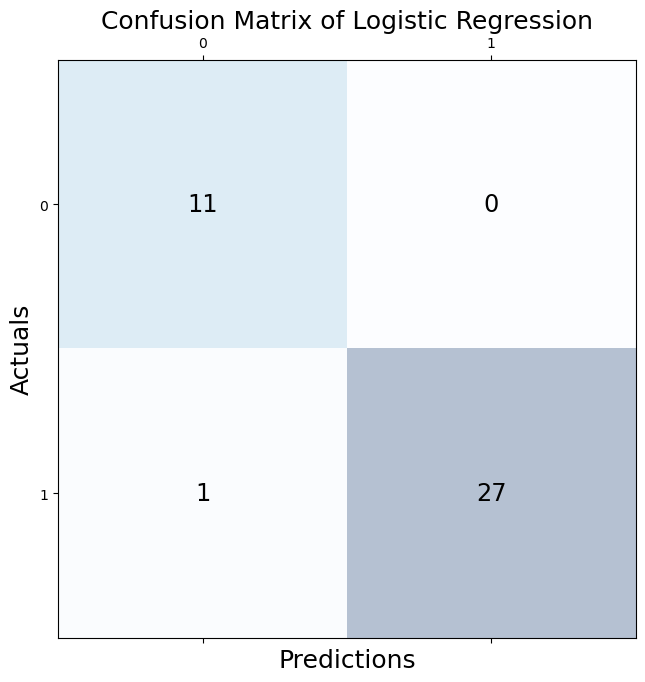

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_val, y_pred_lr)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=18)
plt.savefig('Parkinson_ann.png')
plt.show()

In [75]:
y_pred_lr

array([[0.9987657 ],
       [0.99995816],
       [0.9999546 ],
       [0.9999504 ],
       [0.03036258],
       [0.9999671 ],
       [0.37357795],
       [0.9991683 ],
       [0.9792447 ],
       [0.9999585 ],
       [0.8203979 ],
       [0.9999516 ],
       [0.99937266],
       [0.9998472 ],
       [0.9985475 ],
       [0.00492438],
       [0.99996793],
       [0.7782573 ],
       [0.9002183 ],
       [0.9999001 ],
       [0.9999678 ],
       [0.00255153],
       [0.00205938],
       [0.99996364],
       [0.99995816],
       [0.99597836],
       [0.9998264 ],
       [0.9999659 ],
       [0.00771421],
       [0.00153792],
       [0.998425  ],
       [0.9997309 ],
       [0.99809235],
       [0.00177008],
       [0.3811405 ],
       [0.08391515],
       [0.00443862],
       [0.9994437 ],
       [0.00186809]], dtype=float32)

In [79]:
for i in range (len(y_pred_lr)):
    if y_pred_lr[i]>0.5:
        y_pred_lr[i]=1
    else:
        y_pred_lr[i]=0

In [80]:
y_pred_lr

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [86]:
#accuracy
import sklearn.metrics
r = sklearn.metrics.confusion_matrix(Y_val, y_pred_lr)

r = np.flip(r)

acc = (r[0][0] + r[-1][-1]) / np.sum(r)
print(acc)

0.9743589743589743


In [90]:
#precision
precision = sklearn.metrics.precision_score(Y_val, y_pred_lr, pos_label=1)
print(precision)

1.0


In [92]:
#recall
recall = sklearn.metrics.recall_score(Y_val, y_pred_lr)
print(recall)

0.9642857142857143


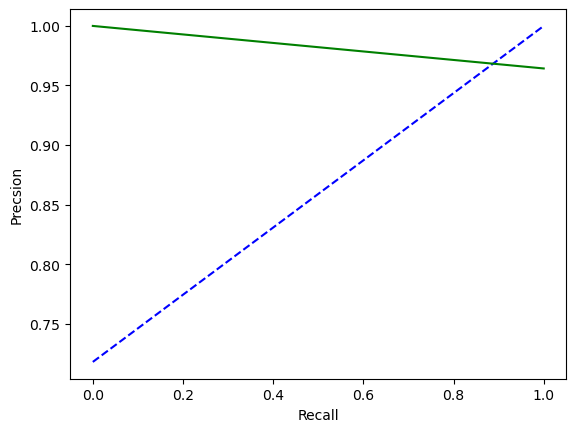

In [102]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_val, y_pred_lr)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")

plt.plot(thresholds, recalls[:-1], "g-",label='hell')
plt.xlabel('Recall')
plt.ylabel('Precsion')
plt.savefig('Parkinson_p_v_r.png')
plt.show()

In [103]:
from sklearn.metrics import f1_score

sklearn.metrics.f1_score(Y_val, y_pred_lr, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

SyntaxError: iterable argument unpacking follows keyword argument unpacking (931842912.py, line 2)

In [112]:
loss, accuracy, f1_score, precision, recall = model_self.evaluate(X_val, Y_val, verbose=0)

ValueError: not enough values to unpack (expected 5, got 2)

In [108]:
precision

0.10439547151327133

In [109]:
recall

0.9743589758872986

In [113]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        28

    accuracy                           0.97        39
   macro avg       0.96      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



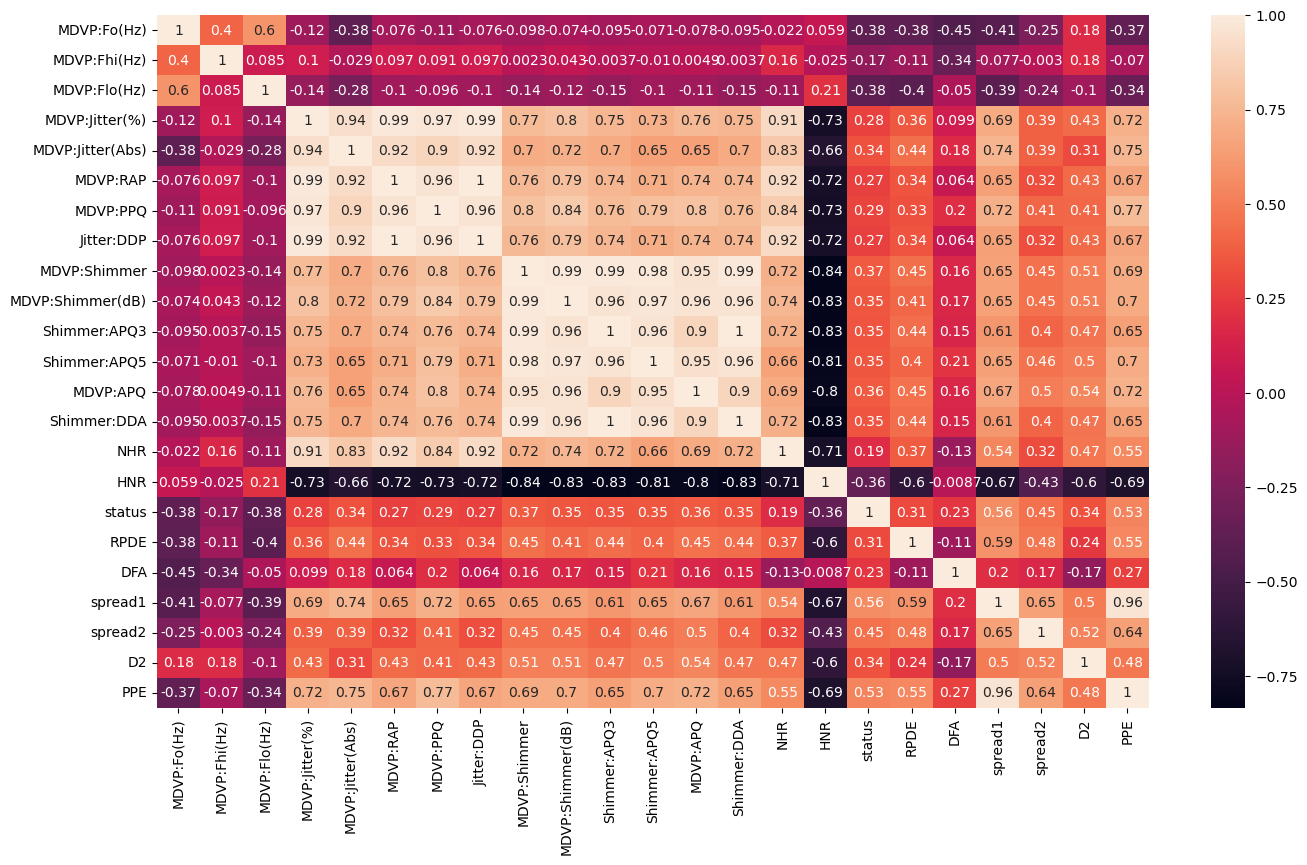

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#ploting Heat Map to check the correlation of the each attribute
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)
plt.savefig('Parkinsons_heatmap.png')

In [119]:
!pip install seaborn